<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/beginner/workshop2/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginner Lecture 2

## Pandas

In [141]:
import pandas as pd
import numpy as np

### Series

In [142]:
s = pd.Series(np.random.randn(5))   # cover what an index is
s

0   -0.019054
1    0.004505
2   -1.185854
3   -0.502231
4   -2.267701
dtype: float64

In [143]:
s[4]  # accessing values by index (kind of like dict)

-2.2677012849939318

In [144]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])  # set custom index
s

a   -0.516993
b    0.246495
c    0.877621
d    0.219927
e   -0.107528
dtype: float64

In [145]:
s['b']  # access series values by index

0.24649519529208766

### DataFrame

In [146]:
df = pd.DataFrame({
    'a': [1, 2, 3, 4],
    'b': [2, 4, 6, 8],
    'c': [3, 6, 9, 12]
})
df

,a,b,c
0,1,2,3
1,2,4,6
2,3,6,9
3,4,8,12


In [147]:
df = pd.DataFrame({   # many ways to initialize a DataFrame, look at documentation!
    'a': [1, 2, 3, 4],
    'b': [2, 4, 6, 8],
    'c': [3, 6, 9, 12]
}, index=['A', 'B', 'C', 'D'])
df

,a,b,c
A,1,2,3
B,2,4,6
C,3,6,9
D,4,8,12


In [148]:
df.index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [149]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [150]:
df = pd.read_csv("https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop2/data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [151]:
df.head()   # top 5 rows, usually used to condense space in jupyter notebook

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
df.tail(7)  # bottom seven rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [153]:
df.shape  # length and width of DataFrame

(891, 12)

### Accessing Values

In [154]:
df["Name"]  # access row

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [155]:
df.Name   # be careful if column title has space in it, this won't work

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [156]:
df[["Name", "Age", "Sex"]].head()   # access specific rows of DataFrame

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


In [157]:
# adding a series to a DataFrame
s = pd.Series(np.random.randn(df.shape[0]))   # create series with random values
s

0      0.295407
1      0.629994
2      0.325281
3      0.089034
4     -0.943244
         ...   
886    1.293318
887   -0.322783
888   -1.229908
889   -0.960058
890    1.020198
Length: 891, dtype: float64

In [158]:
df["RandomValue"] = s   # assign series to DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RandomValue
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.295407
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.629994
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.325281
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.089034
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.943244


In [159]:
df.drop(2).head()   # drop row

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RandomValue
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.295407
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.629994
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.089034
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.943244
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,-0.386979


In [160]:
df.drop("Fare", axis=1).head()  # drop column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,0.295407
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,0.629994
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,0.325281
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,0.089034
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,-0.943244


In [161]:
df.head()   # drop doesn't change df, but returns a new DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RandomValue
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.295407
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.629994
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.325281
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.089034
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.943244


In [162]:
df2 = df.drop("Fare", axis=1).head()  # you can set the return value of drop to another variable
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,0.295407
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,0.629994
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,0.325281
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,0.089034
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,-0.943244


In [163]:
df.drop("Fare", axis=1, inplace=True)   # functionally the same as the previous cell, inplace edits df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,0.295407
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,0.629994
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,0.325281
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,0.089034
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,-0.943244


In [164]:
df.set_index("Name", inplace=True)  # set the index of a DataFrame to a column
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,NaN,S,0.295407
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,C85,C,0.629994
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,0.325281
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,C123,S,0.089034
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,NaN,S,-0.943244


In [165]:
df.loc["Braund, Mr. Owen Harris"]   # locate row by name

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                   22
SibSp                  1
Parch                  0
Ticket         A/5 21171
Cabin                NaN
Embarked               S
RandomValue     0.295407
Name: Braund, Mr. Owen Harris, dtype: object

In [166]:
df.loc["Braund, Mr. Owen Harris", "Age"]  # locate row and column by names

22.0

In [167]:
df.iloc[42]   # locate row by index

PassengerId          43
Survived              0
Pclass                3
Sex                male
Age                 NaN
SibSp                 0
Parch                 0
Ticket           349253
Cabin               NaN
Embarked              C
RandomValue   -0.328836
Name: Kraeff, Mr. Theodor, dtype: object

In [168]:
df.iloc[42:52]  # rows 42 (inclusive) to 52 (exclusive)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
Name,,,,,,,,,,,
"Kraeff, Mr. Theodor",43,0,3,male,NaN,0,0,349253,NaN,C,-0.328836
"Laroche, Miss. Simonne Marie Anne Andree",44,1,2,female,3.0,1,2,SC/Paris 2123,NaN,C,0.105339
"Devaney, Miss. Margaret Delia",45,1,3,female,19.0,0,0,330958,NaN,Q,-1.033241
"Rogers, Mr. William John",46,0,3,male,NaN,0,0,S.C./A.4. 23567,NaN,S,0.334251
"Lennon, Mr. Denis",47,0,3,male,NaN,1,0,370371,NaN,Q,0.487078
"O'Driscoll, Miss. Bridget",48,1,3,female,NaN,0,0,14311,NaN,Q,-0.407557
"Samaan, Mr. Youssef",49,0,3,male,NaN,2,0,2662,NaN,C,0.765630
"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",50,0,3,female,18.0,1,0,349237,NaN,S,0.502578
"Panula, Master. Juha Niilo",51,0,3,male,7.0,4,1,3101295,NaN,S,-0.372477


In [169]:
df.iloc[42:52, :2]  # rows 42 (inclusive) to 52 (exclusive), columns 0 (inclusive) to 2 (exclusive)

,PassengerId,Survived
Name,,
"Kraeff, Mr. Theodor",43,0
"Laroche, Miss. Simonne Marie Anne Andree",44,1
"Devaney, Miss. Margaret Delia",45,1
"Rogers, Mr. William John",46,0
"Lennon, Mr. Denis",47,0
"O'Driscoll, Miss. Bridget",48,1
"Samaan, Mr. Youssef",49,0
"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",50,0
"Panula, Master. Juha Niilo",51,0


In [170]:
df.iloc[:, 3]   # every row, column at index 3

Name
Braund, Mr. Owen Harris                                  male
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    female
Heikkinen, Miss. Laina                                 female
Futrelle, Mrs. Jacques Heath (Lily May Peel)           female
Allen, Mr. William Henry                                 male
                                                        ...  
Montvila, Rev. Juozas                                    male
Graham, Miss. Margaret Edith                           female
Johnston, Miss. Catherine Helen "Carrie"               female
Behr, Mr. Karl Howell                                    male
Dooley, Mr. Patrick                                      male
Name: Sex, Length: 891, dtype: object

In [171]:
df.reset_index(inplace=True)  # set index back to column, index back to numbers
df

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,NaN,S,0.295407
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,C85,C,0.629994
2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,0.325281
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,C123,S,0.089034
4,"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,NaN,S,-0.943244
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,NaN,S,1.293318
887,"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,B42,S,-0.322783
888,"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,NaN,S,-1.229908
889,"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,C148,C,-0.960058


### Filtering

In [172]:
df.head()

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,NaN,S,0.295407
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,C85,C,0.629994
2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,0.325281
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,C123,S,0.089034
4,"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,NaN,S,-0.943244


In [173]:
df.Survived == 1  # DataFrame of boolean values

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [174]:
df[df.Survived == 1].head()   # use boolean DataFrame for indexing

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,C85,C,0.629994
2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,0.325281
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,C123,S,0.089034
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,NaN,S,-0.184196
9,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,2,female,14.0,1,0,237736,NaN,C,1.716495


In [175]:
df[(df.Survived == 1) & (df.Age < 18)].head()   # boolean operator, allows for multiple conditions, & = AND

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
9,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,2,female,14.0,1,0,237736,NaN,C,1.716495
10,"Sandstrom, Miss. Marguerite Rut",11,1,3,female,4.0,1,1,PP 9549,G6,S,0.050722
22,"McGowan, Miss. Anna ""Annie""",23,1,3,female,15.0,0,0,330923,NaN,Q,0.644964
39,"Nicola-Yarred, Miss. Jamila",40,1,3,female,14.0,1,0,2651,NaN,C,0.600654
43,"Laroche, Miss. Simonne Marie Anne Andree",44,1,2,female,3.0,1,2,SC/Paris 2123,NaN,C,0.105339


In [176]:
df[~(df.Pclass == 1) | (df.Sex == "female")].head()   # ~ = NOT, | = OR

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,NaN,S,0.295407
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,C85,C,0.629994
2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,0.325281
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,C123,S,0.089034
4,"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,NaN,S,-0.943244


### Numerical Analysis

In [177]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [178]:
df.Age.mean()   # get mean of series

29.69911764705882

In [179]:
df.Age.median()   # get median of series

28.0

In [180]:
df.Age.mode()   # get mode of series  

0    24.0
dtype: float64

In [181]:
df.Age.sum()  # get sum of series (this isn't useful in this context)

21205.17

In [182]:
df.Age.describe()   # stats for series

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [183]:
df.describe()   # stats for DataFrame

,PassengerId,Survived,Pclass,Age,SibSp,Parch,RandomValue
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,0.021536
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,1.012323
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-3.289452
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,-0.612636
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,0.016628
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,0.682305
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,2.845017


In [184]:
df.Age.value_counts()   # get counts of each age value

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [185]:
# get the 5 oldest passengers using sort_values()
df.sort_values("Age", ascending=False).head()

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,RandomValue
630,"Barkworth, Mr. Algernon Henry Wilson",631,1,1,male,80.0,0,0,27042,A23,S,0.304195
851,"Svensson, Mr. Johan",852,0,3,male,74.0,0,0,347060,NaN,S,1.459404
493,"Artagaveytia, Mr. Ramon",494,0,1,male,71.0,0,0,PC 17609,NaN,C,0.208572
96,"Goldschmidt, Mr. George B",97,0,1,male,71.0,0,0,PC 17754,A5,C,-0.616210
116,"Connors, Mr. Patrick",117,0,3,male,70.5,0,0,370369,NaN,Q,-1.182644


### Groupby

In [186]:
df.groupby("Sex")   # group all rows by male or female

In [187]:
df.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,RandomValue
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,-0.010713
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,0.039086


In [188]:
df.groupby(["Sex", "Survived"]).mean()  # group by multiple criteria

PassengerId    Pclass  ...     Parch  RandomValue
Sex    Survived                         ...                       
female 0          434.851852  2.851852  ...  1.037037     0.002431
       1          429.699571  1.918455  ...  0.515021    -0.015283
male   0          449.121795  2.476496  ...  0.207265     0.049221
       1          475.724771  2.018349  ...  0.357798    -0.004428

[4 rows x 6 columns]

## Matplotlib

In [189]:
import matplotlib.pyplot as plt

### Basic Plotting

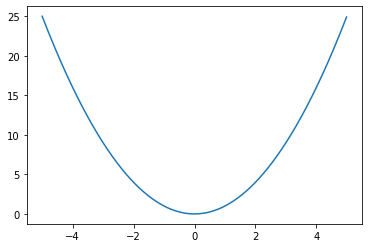

In [190]:
# Plotting a function
x = np.arange(-5, 5, 0.01)  # points between -5 and 5 spaced 0.1 apart
y = x ** 2

plt.plot(x, y)
plt.show()

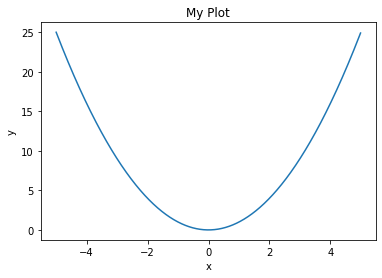

In [191]:
# Basic plot formatting
plt.plot(x, y)
plt.title("My Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

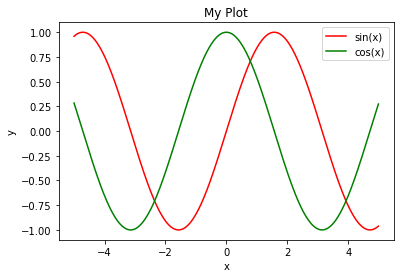

In [192]:
# Plotting multiple curves, 
x = np.arange(-5, 5, 0.01)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, 'r', label="sin(x)")
plt.plot(x, y2, 'g', label="cos(x)")
plt.title("My Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

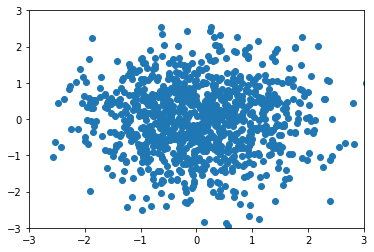

In [193]:
# Scatter plot basics, limiting axes
x = np.random.randn(1000)
y = np.random.randn(1000)

plt.scatter(x, y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

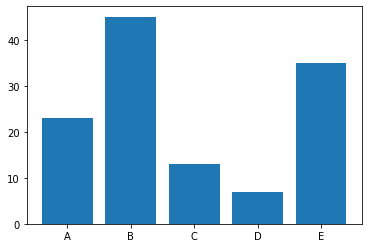

In [194]:
# Bar chart basics
labels = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 13, 7, 35]
plt.bar(labels, values)
plt.show()

### Plotting Example (Interactive example with audience)
- PLOT THE AMOUNT OF SURVIVORS FROM EACH PASSENGER CLASS

In [195]:
data = df.groupby("Pclass").sum()
data

,PassengerId,Survived,Age,SibSp,Parch,RandomValue
Pclass,,,,,,
1,99705,136,7111.42,90,77,-0.917063
2,82056,87,5168.83,74,70,17.254411
3,215625,119,8924.92,302,193,2.851585


In [196]:
data = data["Survived"]
data

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

([<matplotlib.axis.XTick at 0x7f148d070590>,
 <a list of 3 Text major ticklabel objects>)

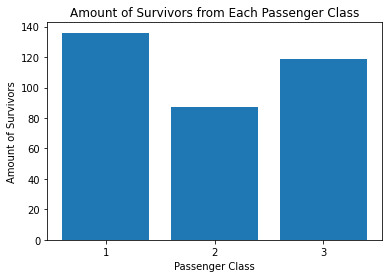

In [197]:
plt.bar(data.index, data)
plt.title("Amount of Survivors from Each Passenger Class")
plt.ylabel("Amount of Survivors")
plt.xlabel("Passenger Class")
plt.xticks([1, 2, 3])   # get rid of decimals

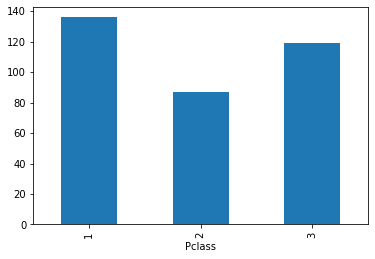

In [198]:
data.plot(kind="bar")   # another way - using pandas's plotting function

#Derivatives and Gradient

In [199]:
#sympy

In [200]:
y = np.array([1, 2, 4, 7, 11, 16])
der = np.gradient(y)
der 

array([1. , 1.5, 2.5, 3.5, 4.5, 5. ])

#Operation on sets


In [201]:
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([3, 4, 5, 6])

newarr = np.union1d(arr1, arr2) #union of sets
print(newarr)

[1 2 3 4 5 6]


In [202]:
newarr = np.setxor1d(arr1, arr2) #symmetric difference of sets
newarr

array([1, 2, 5, 6])

In [203]:
newarr = np.intersect1d(arr1, arr2) #intersection of sets
newarr

array([3, 4])

#Summation

In [204]:
np.sum(arr1)

10

In [205]:
np.sum(arr1[1:3]) #index 1 (inclusive) to 3 (not inclusive)

5

#Max and Argmax

In [206]:
#argmax
  #Returns the indices of the maximum values along an axis.
  #In case of multiple occurrences of the maximum values, the indices corresponding to the first occurrence are returned.
a = np.arange(18).reshape(6,3) +10 # this takes element from 0 - 18 and then rearranges it to a shape where there are six arrays with three elements in each + 10
# arrange - Return evenly spaced values within a given interval.
# reshape - Gives a new shape to an array without changing its data.
# zeros - Return a new array of given shape and type, filled with zeros.

print("a : ",a)
print("argmax: ", np.argmax(a))

#Maximum - Element-wise maximum of array elements.
#Compare two arrays and returns a new array containing the element-wise maxima.
print("maximum: ", np.maximum(a[0],a[1]))

a :  [[10 11 12]
 [13 14 15]
 [16 17 18]
 [19 20 21]
 [22 23 24]
 [25 26 27]]
argmax:  17
maximum:  [13 14 15]


#Linear Regression



Getting raw data

In [207]:
data = np.genfromtxt('https://raw.githubusercontent.com/tidaltamu/workshops/main/beginner/workshop2/data/linear_regression.csv', delimiter=',')
data

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

Split into x and y (dependent vs independent variable)

In [208]:
X = data[:, 0]
Y = data[:, 1]

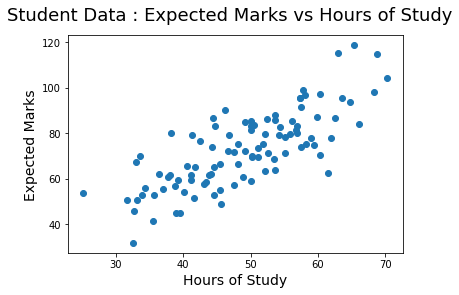

In [209]:
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

In [210]:
learning_rate = 0.0001
max_iteration = 50

Will continue next time